In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle

In [2]:
# ROBOT
robot1 = Robot_3R([2, 2, 0.5])

# PATH
dx    = TolerancedNumber(2.9, 2.8, 3.0, samples=5)
dy    = np.linspace(-1.5, 1.5, 10)
angle = TolerancedNumber(0.0, -np.pi/2, np.pi/2, samples=10)
path1 = [TrajectoryPt([dx, yi, angle]) for yi in dy]

# COLLISION SCENE
sc1 = [Rectangle(0.7, 0, 2, 0.3, 0),
       Rectangle(3, -2.5, 0.5, 5, 0)]

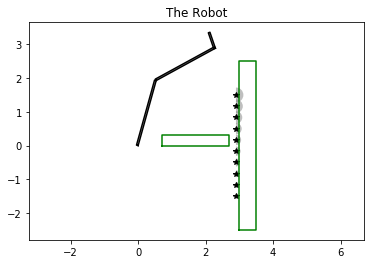

In [3]:
fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, [1.3, -0.8, 1.4], 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'g')
plt.show()

In [7]:
from ppr.sampling import cart_to_joint
#from ppr.sampling import get_shortest_path
from ppr.graph_pure_python import get_shortest_path
from ppr.graph_pure_python import get_shortest_path2
from ppr.graph_pure_python import get_shortest_path3

In [8]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)

In [9]:
sol = get_shortest_path3(path_js)
print(sol)

{'success': True, 'paths': [[array([-1.25019345,  1.2143082 ,  1.25761573]), array([-1.16519757,  1.26597791,  1.12095014]), array([-1.12800413,  1.36716983,  1.33163062]), array([-1.05246572,  1.4300193 ,  1.19324275]), array([-0.95785255,  1.46378666,  1.06486222]), array([-0.84697651,  1.4689188 ,  0.94885404]), array([-0.74143529,  1.48287058,  0.82936104])], [array([ 0.84697651, -1.4689188 ,  2.19273862]), array([ 0.95785255, -1.46378666,  2.07673044]), array([ 1.07582515, -1.46560243,  1.9605736 ])]], 'split_points': [0, 7], 'costs': [1.6269361974448682, 0.4679615714763572]}


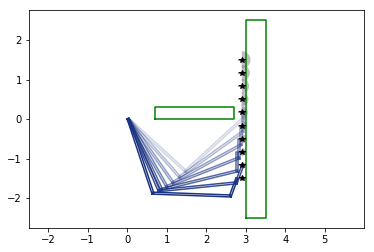

In [10]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path(ax2, sol['paths'][0])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

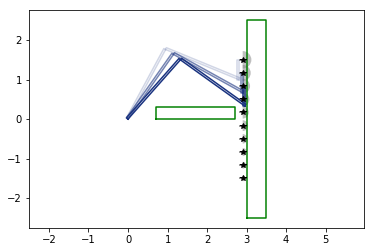

In [11]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path(ax2, sol['paths'][1])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()